In [1]:
import requests
import cv2
from matplotlib import pyplot as plt 
import numpy as np



## Laplacian of Gaussian
The Laplacian of Gaussian (LoG) is an image processing operation that involves two basic operations: smoothing (convolution with a Gaussian filter) and computing the Laplacian (second derivative) of the resulting smoothed image

Mathematically. if $I$ is the orginal image, $G_\sigma$ is the 2D Gaussian function, and $\nabla^2$ represents the Laplacian operator, the Laplacian of Gaussian (LoG) is given by:

$LoG\{I\} =  \nabla^2 (G_\sigma * I) = (\nabla^2 G_\sigma) * I$

$\nabla^2 G_\sigma = -\frac{1}{\pi \sigma^4}[1 - \frac{x^2+y2}{2\sigma^2}] \exp(- \frac{x^2+y2}{2\sigma^2})$

This means that we can use the following two equivalent ways to compute the LoG of the image.

- compute the LoG by first obtaining the LoG kernel and convolving that with the image: $(\nabla^2 G_\sigma) * I$

- computes the LoG by two sequential operations: blurring an image with a Gaussian filter and then applying the Laplacian operator: $\nabla^2 (G_\sigma * I)$

This equivalence is possible because convolution, the mathematical operation involved in both processes, is commutative. Essentially, whether you blur the image first and then apply the Laplacian or vice versa, the end result is the same. 



***Compute the LoG by first obtaining the LoG kernel and convolving that with the image***

In [7]:
def LoG(ksize, sigma):
    # returns sigma normalized values
    assert ksize%2 == 1
    x, y = np.meshgrid(np.arange(-(ksize // 2), ksize // 2 + 1), np.arange(-(ksize // 2), ksize // 2 + 1))
    return 483*sigma**2 * -1/(np.pi * sigma**4) * (1 - (x**2 + y**2)/(2*sigma**2)) * np.exp(- (x**2 + y**2)/(2*sigma**2))


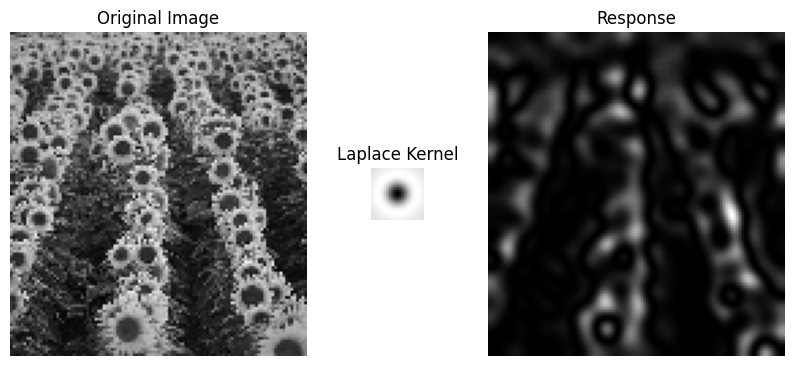

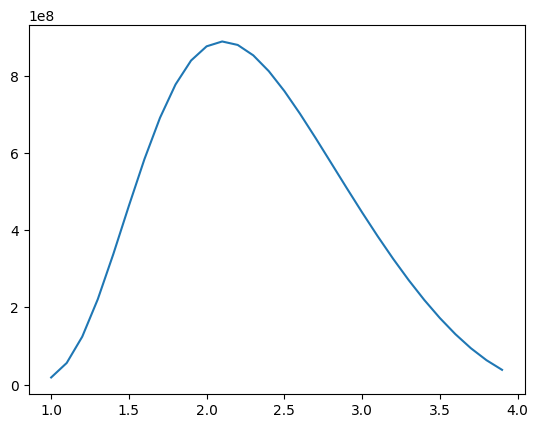

In [20]:
# Read the image
image = cv2.imread('data/images/sunflowers.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (int(image.shape[1]/3), int(image.shape[0]/3)), interpolation=cv2.INTER_NEAREST)

res = []
for i in np.arange(1,4,.1):
    laplace_kernel = LoG(21, i)
     
    # Apply the laplacian 
    #response = cv2.Laplacian(image, cv2.CV_32F, ksize=i, scale=i)
    response = cv2.filter2D(image, cv2.CV_32F, laplace_kernel)
    
    # Squared response
    response = response ** 2

    # record the response at the following pixel
    res.append((i, response[82,50]))

# Display the original image and the edges obtained with the custom kernel
%matplotlib inline
fig, ax = plt.subplots(1,3, 
                       gridspec_kw={'width_ratios': [5, 5*laplace_kernel.shape[0]/image.shape[0], 5],
                                   'wspace': .3})
fig.set_figwidth(10)
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image'), ax[0].axis('off')
ax[1].imshow(laplace_kernel, cmap='gray')
ax[1].set_title('Laplace Kernel'), ax[1].axis('off')
ax[2].imshow(response, cmap='gray')
ax[2].set_title('Response'), ax[2].axis('off') 
#plt.plot(50,82,'r+')

plt.figure()
plt.plot(np.array(res)[:,0],np.array(res)[:,1])


**Computes the LoG by two sequential operations: blurring an image with a Gaussian filter and then applying the Laplacian operator**
[Additional Reading](https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html)\
[Additional Reading](https://theailearner.com/tag/cv2-laplacian/)

(Text(0.5, 1.0, 'Response'), (-0.5, 108.5, 118.5, -0.5))

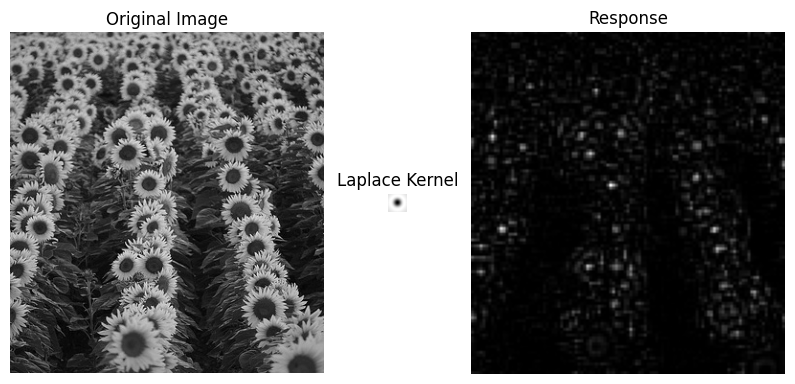

In [21]:
# Read the image
image = cv2.imread('data/images/sunflowers.jpg', cv2.IMREAD_GRAYSCALE)
image1 = cv2.resize(image, (int(image.shape[1]/3), int(image.shape[0]/3)), interpolation=cv2.INTER_NEAREST)
image2 = cv2.GaussianBlur(image1, ksize=(5,5), sigmaX = 2, sigmaY = 2)

#lx = cv2.getDerivKernels(dx=2,dy=0,ksize=15,normalize=True)
#ly = cv2.getDerivKernels(dx=0,dy=2,ksize=15,normalize=True)
#laplace_kernel = np.outer(lx[1],lx[0]) + np.outer(ly[1],ly[0])
 
i=3
# Apply the laplacian 
response = cv2.Laplacian(image2, cv2.CV_32F, ksize=i, scale=i)
#response = cv2.filter2D(image, cv2.CV_32F, laplace_kernel)

# Squared response
response = response**2

# Display the original image and the edges obtained with the custom kernel
%matplotlib inline
fig, ax = plt.subplots(1,3, 
                       gridspec_kw={'width_ratios': [5, 5*laplace_kernel.shape[0]/image.shape[0], 5],
                                   'wspace': .3})
fig.set_figwidth(10)
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image'), ax[0].axis('off')
ax[1].imshow(laplace_kernel, cmap='gray')
ax[1].set_title('Laplace Kernel'), ax[1].axis('off')
ax[2].imshow(response, cmap='gray')
ax[2].set_title('Response'), ax[2].axis('off') 